   Problem Statement:
==============================================================================================================

--------------------------------------------------------------------------------------------------------------
About Company:
--------------------------------------------------------------------------------------------------------------
BC Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. 
The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

--------------------------------------------------------------------------------------------------------------
Problem:
--------------------------------------------------------------------------------------------------------------
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while 
filling out the online application form. 

These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have given a problem identifying the customer segments eligible for 
loan amounts to target these customers specifically. Here they have provided a partial dataset. 
(see data-for-project-1 folder).


# 1. Problem statement

Automation of loan eligibility

# 2. Hypothesis

Somethingggg

# 3. Getting the system ready and loading the data

In [502]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px


df_raw = pd.read_csv('../data/raw_data.csv')
df_test = pd.read_csv('../data/validation.csv')


In [504]:
df_raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 4. Understanding the data

In [507]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [509]:
print(f'The data has {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.')

The data has 614 rows and 13 columns.


In [511]:
df_raw['Credit_History'] = df_raw['Credit_History'].astype(object)

In [513]:
#Check the cardinality (small differences in a feature)
feature_cardinality = df_raw.select_dtypes('object').nunique()
feature_cardinality

Loan_ID           614
Gender              2
Married             2
Dependents          4
Education           2
Self_Employed       2
Credit_History      2
Property_Area       3
Loan_Status         2
dtype: int64

In [515]:
# The Loan_ID column is not needed so we can remove it
if 'Loan_ID' in df_raw.columns:
        df_raw.drop(columns = 'Loan_ID', inplace=True)
df_raw.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 5. Exploratory Data Analysis


### Summary Statistics
i. **Univariate analysis**
- Looking at each variable independtly

In [519]:
df_raw.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


### Charts

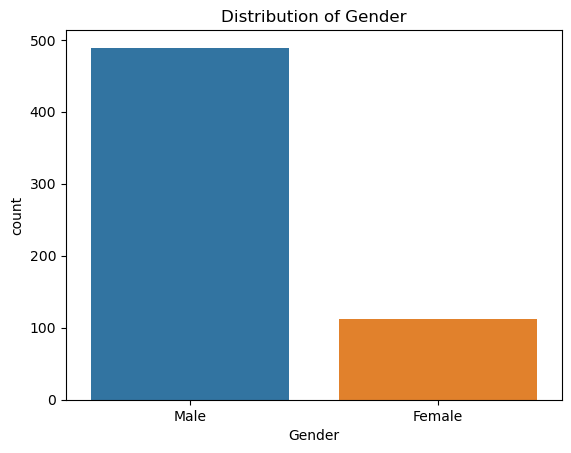

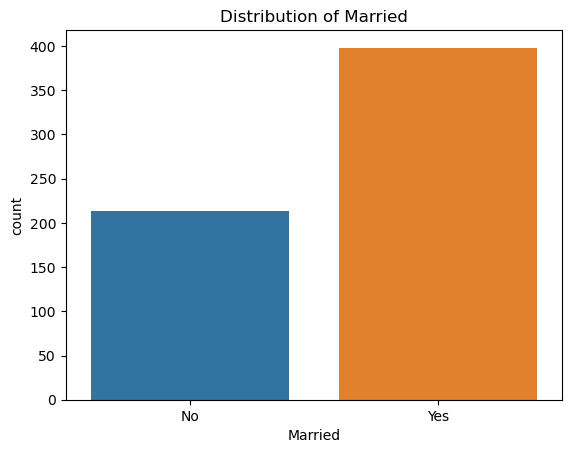

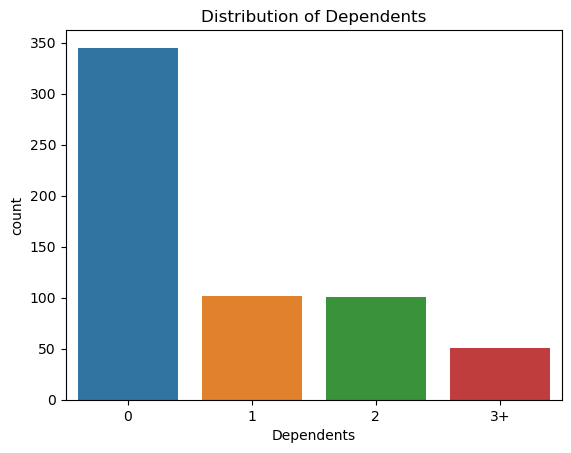

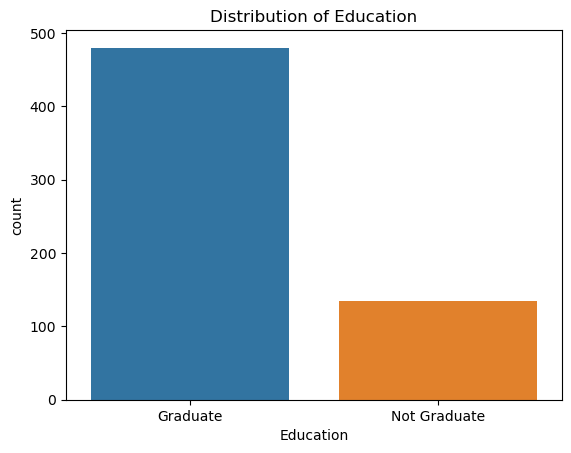

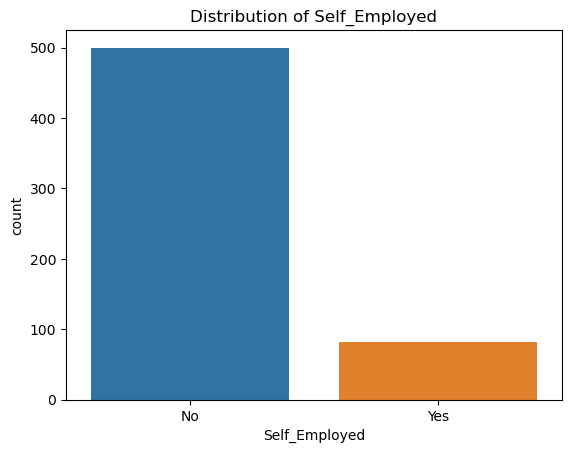

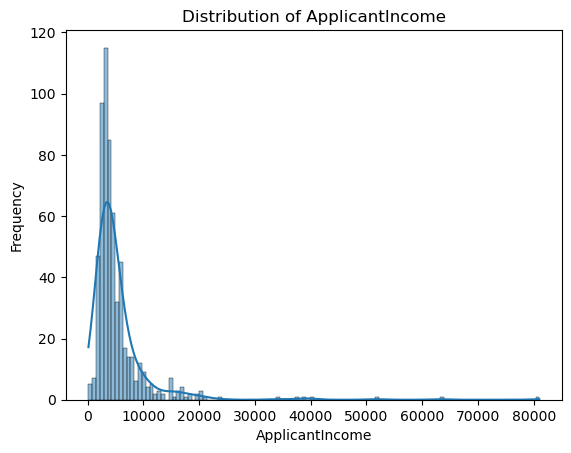

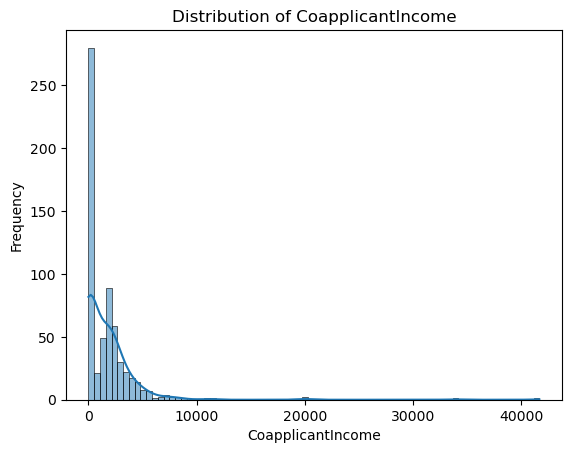

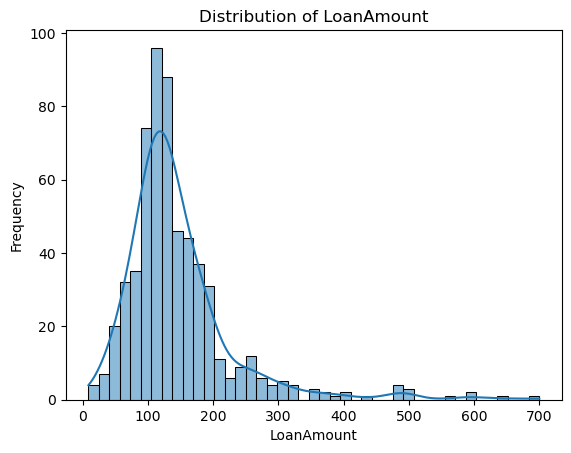

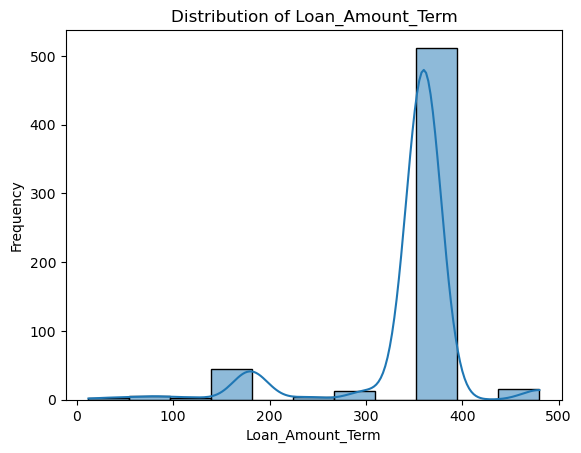

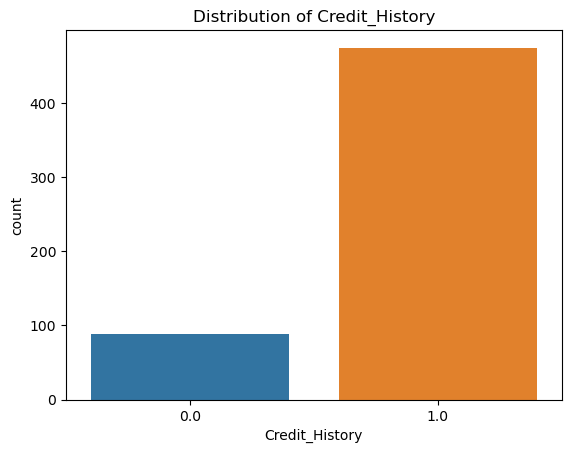

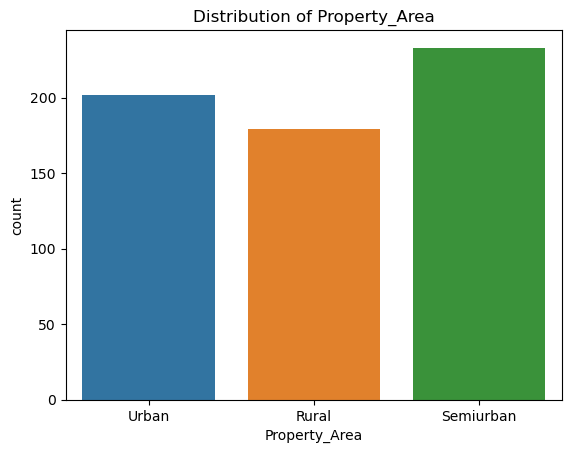

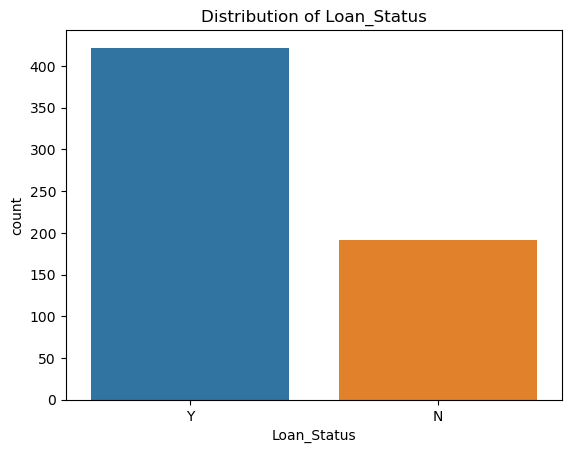

In [521]:
for column in df_raw.columns:
    if df_raw[column].dtype == 'object':
        # Using a countplot for categorical variables
        sns.countplot(x = column, data = df_raw)
        plt.title(f'Distribution of {column}')
        plt.show()
    else:
        # Using a histogram for numerical variables
        sns.histplot(df_raw[column], kde = True)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.show()

ii. **Bivariate analysis**
- Looking at variable relationships

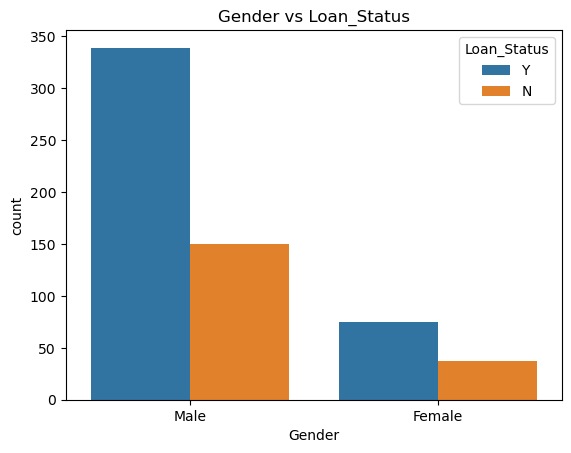

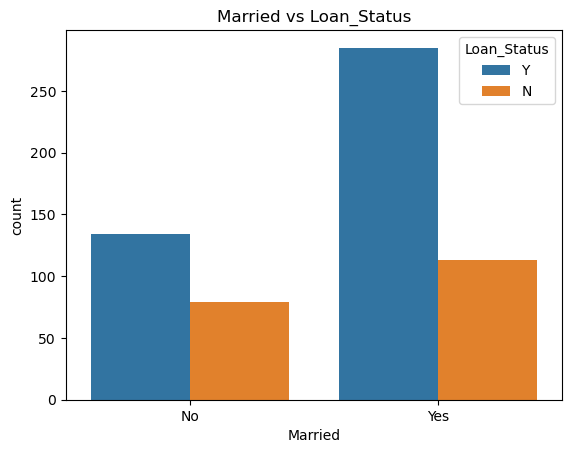

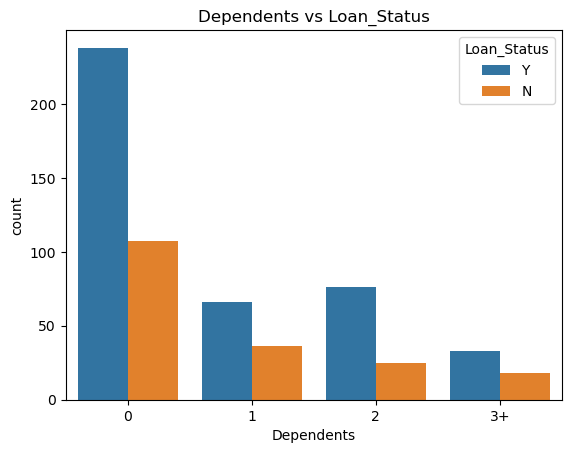

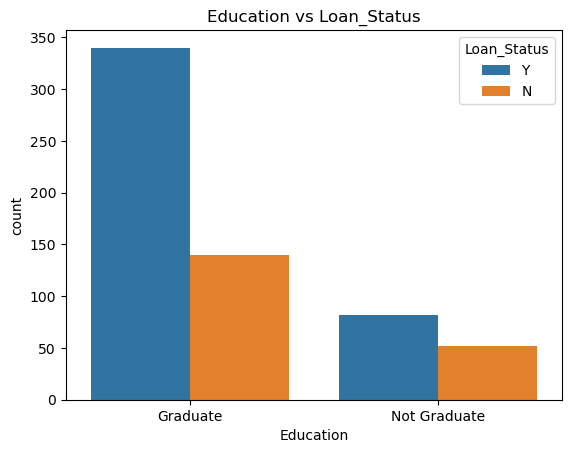

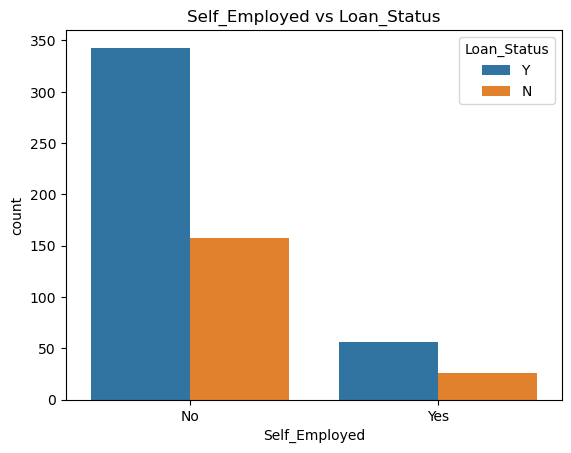

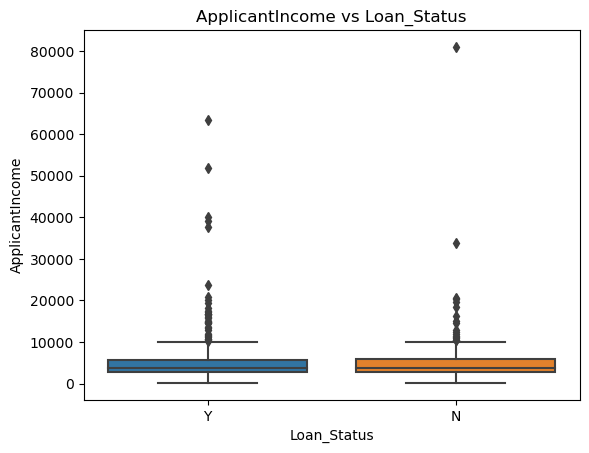

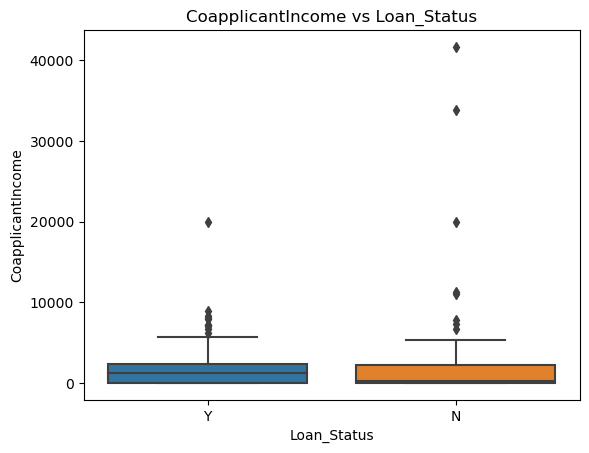

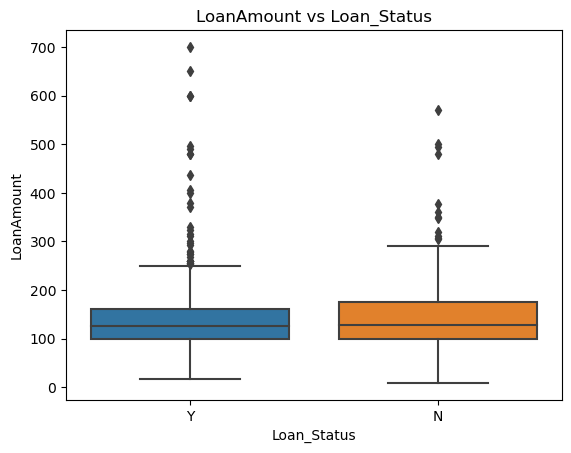

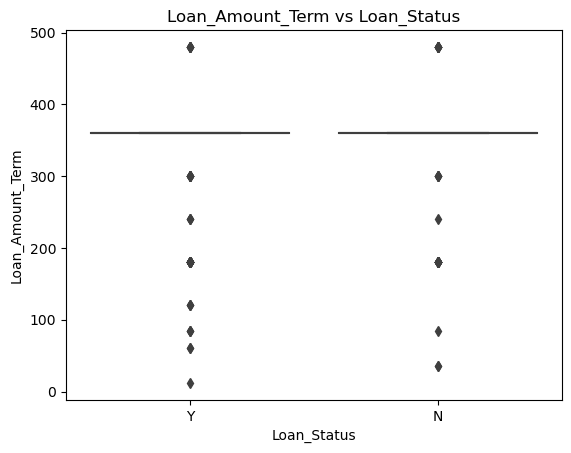

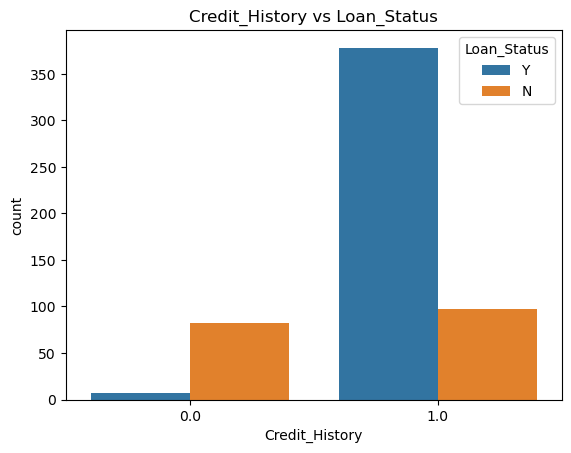

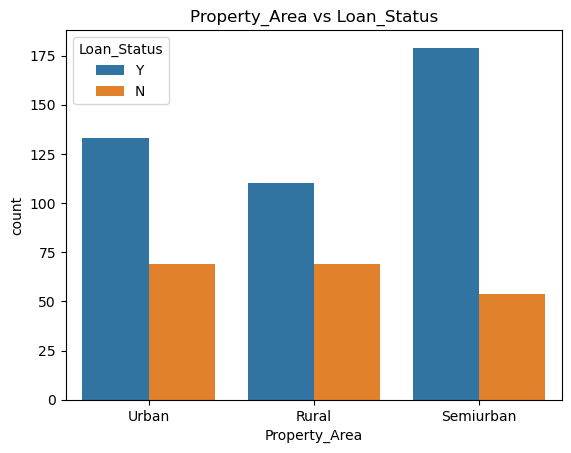

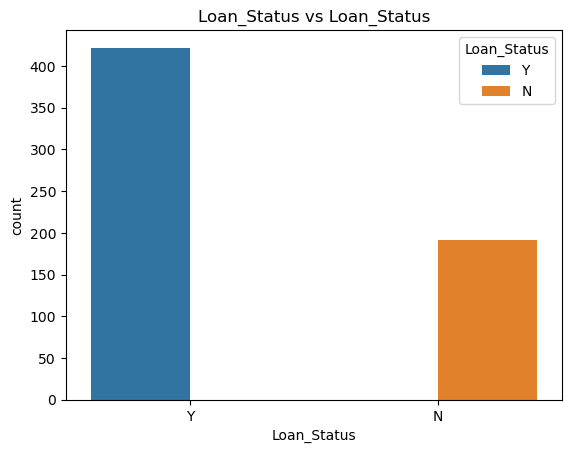

In [524]:
for column in df_raw.columns:
    if df_raw[column].dtype == 'object':
        # Using a countplot for categorical variables
        sns.countplot(x = column, hue ='Loan_Status', data = df_raw)
        plt.title(f'{column} vs Loan_Status')
        plt.show()
    else:
        # Using a boxplot for numerical variables
        sns.boxplot(x ='Loan_Status', y = column, data = df_raw)
        plt.title(f'{column} vs Loan_Status')
        plt.show()

### Identify the missing values


In [526]:
missing_values = (
    df_raw.isnull().sum()/len(df_raw)*100
).round(0).astype(int)

print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)
missing_values.round(2)

Column			% missing
-----------------------------------


Gender               2
Married              0
Dependents           2
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           4
Loan_Amount_Term     2
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int32

### Replace NaN with values using the mean strategy

In [528]:
for col in df_raw.columns:
    if df_raw[col].dtype == 'int64' or df_raw[col].dtype == 'float64':
        df_raw[col].fillna(df_raw[col].mean(), inplace=True)
    else:
        df_raw[col].fillna(df_raw[col].mode(), inplace=True)
df_raw.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Handling outliers

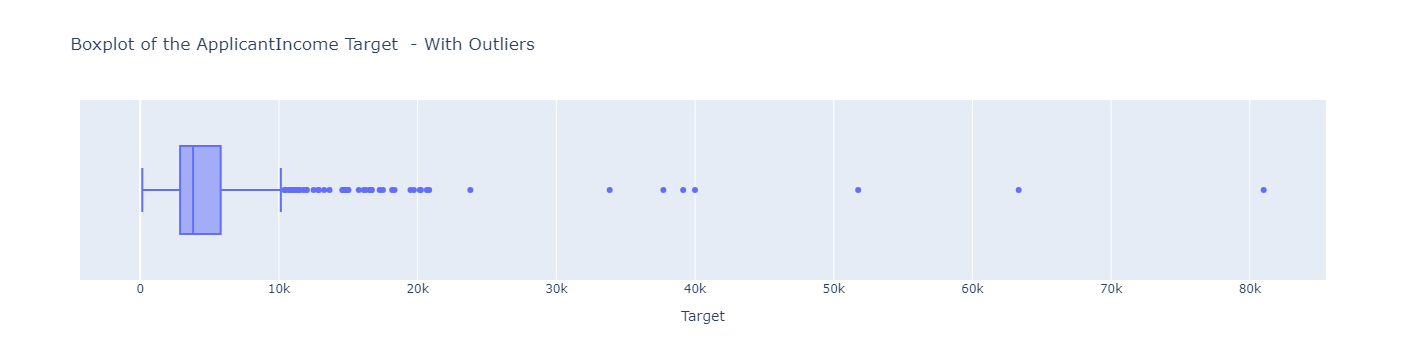

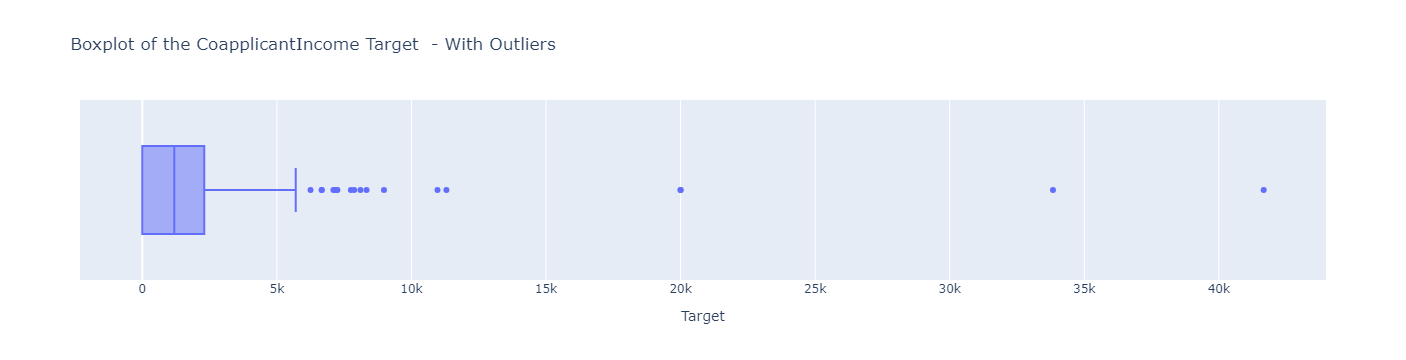

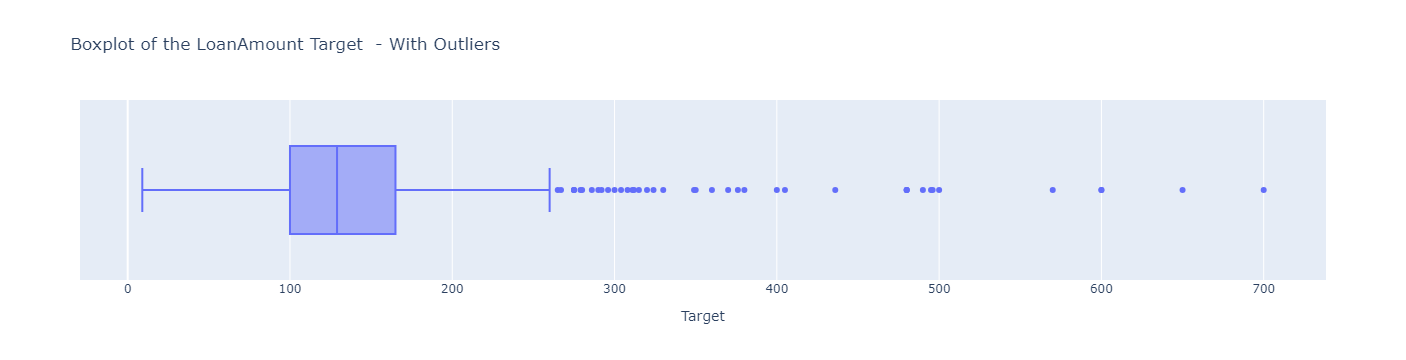

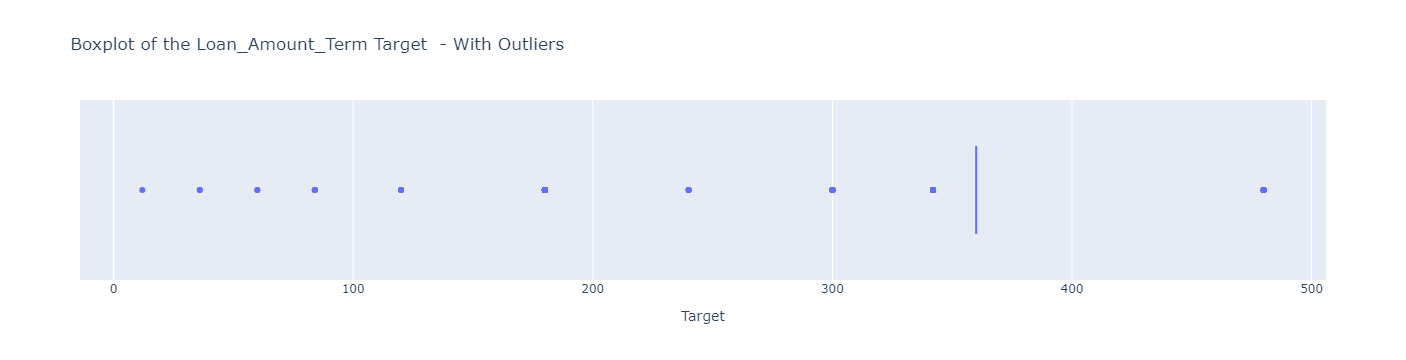

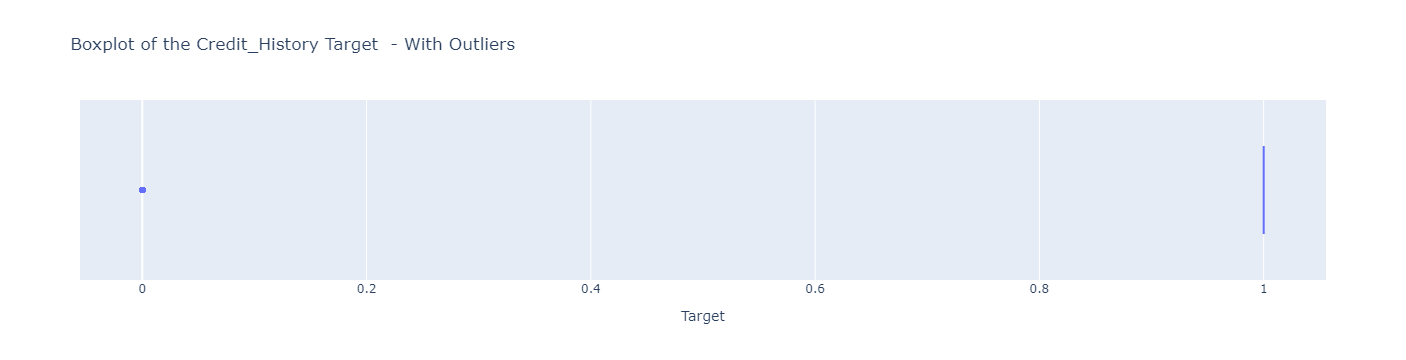

In [530]:
for col in df_raw.columns:
    if df_raw[col].dtype == 'float64' or df_raw[col].dtype == 'int64':
        fig = px.box(
            df_raw, 
            x = col, 
            orientation='h',
            title=f'Boxplot of the {col} Target  - With Outliers'
        )
        fig.update_layout(xaxis_title='Target')
        fig.show()

### Removing the outliers

In [532]:
#Removing data from the dataset which doesn't comply to the specified rule
min_mask = lambda col, val: df_raw[col] < val
income_mask = min_mask('ApplicantIncome',10000)
coapplicant_income_mask = min_mask('CoapplicantIncome',5701)
loan_ammount_mask = min_mask('LoanAmount',260)

df_raw_new = df_raw[income_mask & coapplicant_income_mask & loan_ammount_mask]
df_raw_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Data transformation

Transform the 'Y' and 'N' labels of loan status to 1 or 0

In [535]:
if 'Loan_Status' in df_raw_new.columns:
        df_raw_new['Loan_Status'] = df_raw_new['Loan_Status'].apply(lambda s: 1 if s == 'Y' else 0)

C:\Users\werne\AppData\Local\Temp\ipykernel_28632\618986255.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [536]:
df_raw_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [537]:
ohe = OneHotEncoder(
    use_cat_names=True, 
    cols=['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area']
    )

encoded_df = ohe.fit_transform(df_raw_new)

In [539]:
# # Encode all categorical data to 0 or 1 for logistic regression
# for col in encoded_df.columns:
#     if encoded_df[col].dtype == 'bool':
#         encoded_df[col] = encoded_df[col].apply(lambda x: 1 if x == True else 0)
        
encoded_df

,Gender_Male,Gender_Female,Gender_nan,Married_No,Married_Yes,Married_nan,Dependents_0,Dependents_1,Dependents_3+,Dependents_2,...,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_1.0,Credit_History_0.0,Credit_History_nan,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban,Loan_Status
0,1,0,0,1,0,0,1,0,0,0,...,0.0,146.412162,360.0,1,0,0,1,0,0,1
1,1,0,0,0,1,0,0,1,0,0,...,1508.0,128.000000,360.0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,1,0,0,0,...,0.0,66.000000,360.0,1,0,0,1,0,0,1
3,1,0,0,0,1,0,1,0,0,0,...,2358.0,120.000000,360.0,1,0,0,1,0,0,1
4,1,0,0,1,0,0,1,0,0,0,...,0.0,141.000000,360.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,1,0,0,1,0,0,0,...,0.0,71.000000,360.0,1,0,0,0,1,0,1
610,1,0,0,0,1,0,0,0,1,0,...,0.0,40.000000,180.0,1,0,0,0,1,0,1
611,1,0,0,0,1,0,0,1,0,0,...,240.0,253.000000,360.0,1,0,0,1,0,0,1
612,1,0,0,0,1,0,0,0,0,1,...,0.0,187.000000,360.0,1,0,0,1,0,0,1


### Modeling


In [550]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import layers
from tensorflow import keras
import joblib

In [552]:
encoded_df.drop(columns = 'Married_nan', inplace= True)

In [554]:
X = encoded_df.drop(['Loan_Status'], axis=1)
y = encoded_df['Loan_Status']

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [558]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [560]:
model = Sequential([
    Dense(25, activation='relu', input_shape=(25,)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\werne\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



### Feature engineering


In [565]:
df_raw_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


C:\Users\werne\AppData\Local\Temp\ipykernel_28632\576720590.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1,7583.0


C:\Users\werne\AppData\Local\Temp\ipykernel_28632\3770185181.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Term_Category
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0,Medium-term
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0,Medium-term
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0,Medium-term
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0,Medium-term
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0,Medium-term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1,2900.0,Medium-term
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1,4106.0,Short-term
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1,8312.0,Medium-term
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1,7583.0,Medium-term


C:\Users\werne\AppData\Local\Temp\ipykernel_28632\2668247465.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Term_Category,Income_Stability
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0,Medium-term,4135.867563
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0,Medium-term,2174.353352
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0,Medium-term,2121.320344
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0,Medium-term,159.099026
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0,Medium-term,4242.640687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1,2900.0,Medium-term,2050.609665
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1,4106.0,Short-term,2903.380444
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1,8312.0,Medium-term,5538.060310
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1,7583.0,Medium-term,5361.990722


C:\Users\werne\AppData\Local\Temp\ipykernel_28632\984868074.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 0 to 613
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              520 non-null    object 
 1   Married             527 non-null    object 
 2   Dependents          516 non-null    object 
 3   Education           529 non-null    object 
 4   Self_Employed       500 non-null    object 
 5   ApplicantIncome     529 non-null    int64  
 6   CoapplicantIncome   529 non-null    float64
 7   LoanAmount          529 non-null    float64
 8   Loan_Amount_Term    529 non-null    float64
 9   Credit_History      486 non-null    float64
 10  Property_Area       529 non-null    object 
 11  Loan_Status         529 non-null    int64  
 12  Total_Income        529 non-null    float64
 13  Loan_Term_Category  529 non-null    object 
 14  Income_Stability    529 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 66.1+ KB


In [579]:
toets

,Gender_Male,Gender_Female,Gender_nan,Married_No,Married_Yes,Married_nan,Dependents_0,Dependents_1,Dependents_3+,Dependents_2,...,Credit_History_nan,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban,Loan_Status,Total_Income,Loan_Term_Category_Medium-term,Loan_Term_Category_Short-term,Loan_Term_Category_Long-term,Income_Stability
0,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,5849.0,1,0,0,4135.867563
1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,6091.0,1,0,0,2174.353352
2,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,3000.0,1,0,0,2121.320344
3,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,4941.0,1,0,0,159.099026
4,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,6000.0,1,0,0,4242.640687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,1,2900.0,1,0,0,2050.609665
610,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,4106.0,0,1,0,2903.380444
611,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,8312.0,1,0,0,5538.060310
612,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,7583.0,1,0,0,5361.990722


,Gender_Male,Gender_Female,Gender_nan,Married_No,Married_Yes,Married_nan,Dependents_0,Dependents_1,Dependents_3+,Dependents_2,...,Credit_History_nan,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban,Loan_Status,Total_Income,Loan_Term_Category_Medium-term,Loan_Term_Category_Short-term,Loan_Term_Category_Long-term,Income_Stability
0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,5849.0,1,0,0,4135.867563
1,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,6091.0,1,0,0,2174.353352
2,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,3000.0,1,0,0,2121.320344
3,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,4941.0,1,0,0,159.099026
4,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,6000.0,1,0,0,4242.640687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,0,1,0,1,0,0,0,...,0,0,1,0,1,2900.0,1,0,0,2050.609665
610,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,4106.0,0,1,0,2903.380444
611,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,8312.0,1,0,0,5538.060310
612,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,7583.0,1,0,0,5361.990722
